In [ ]:
import pandas as pd
import numpy as np

# Generate data for 50 entries
countries = [
    "India", "USA", "Germany", "Japan", "Brazil", "China", "UK", "Canada", "Australia", "Russia",
    "France", "Italy", "South Korea", "South Africa", "Mexico", "Spain", "Argentina", "Turkey",
    "Nigeria", "Egypt", "Pakistan", "Indonesia", "Bangladesh", "Vietnam", "Thailand", "Philippines",
    "Malaysia", "Saudi Arabia", "Iran", "Colombia", "Chile", "Peru", "Kenya", "Ethiopia", "Poland",
    "Ukraine", "Netherlands", "Belgium", "Sweden", "Norway", "Denmark", "Switzerland", "New Zealand",
    "Portugal", "Greece", "Czech Republic", "Hungary", "Finland", "Ireland", "Singapore", "UAE"
]

# Ensure we have exactly 50 entries
countries = countries[:50]


np.random.seed(42)
literacy_rate = np.round(np.random.uniform(50, 100, 50), 2)
education_expenditure = np.round(np.random.uniform(2, 8, 50), 2)
average_years_schooling = np.round(np.random.uniform(4, 16, 50), 1)
enrollment_rate = np.round(np.random.uniform(70, 100, 50), 2)


education_data = pd.DataFrame({
    "Country": countries,
    "Literacy_Rate (%)": literacy_rate,
    "Education_Expenditure (% of GDP)": education_expenditure,
    "Average_Years_of_Schooling": average_years_schooling,
    "Enrollment_Rate (%)": enrollment_rate,
})

# Display the first 10 rows of the dataset
print("Sample Education Dataset:")
print(education_data.head(10))

# Save the dataset to a CSV file (optional)
# education_data.to_csv("education_dataset.csv", index=False)



Sample Education Dataset:
     Country  Literacy_Rate (%)  Education_Expenditure (% of GDP)  \
0      India              68.73                              7.82   
1        USA              97.54                              6.65   
2    Germany              86.60                              7.64   
3      Japan              79.93                              7.37   
4     Brazil              57.80                              5.59   
5      China              57.80                              7.53   
6         UK              52.90                              2.53   
7     Canada              93.31                              3.18   
8  Australia              80.06                              2.27   
9     Russia              85.40                              3.95   

   Average_Years_of_Schooling  Enrollment_Rate (%)  
0                         4.4                97.25  
1                        11.6                77.19  
2                         7.8                74.35  
3 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

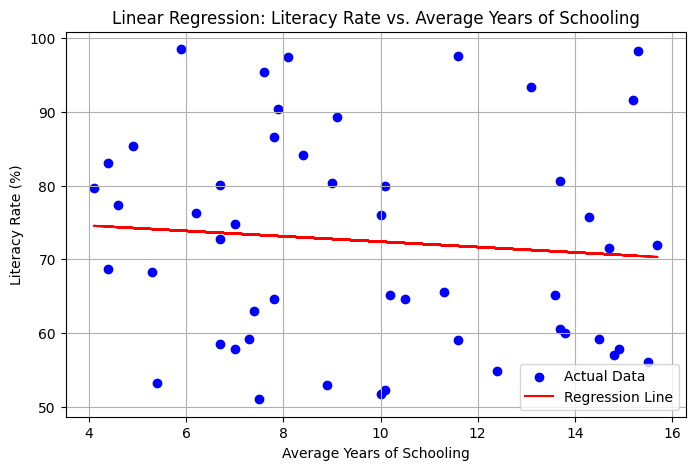

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select two columns from the dataset
X = education_data["Average_Years_of_Schooling"].values.reshape(-1, 1)  # Feature
y = education_data["Literacy_Rate (%)"].values  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, lr_model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression: Literacy Rate vs. Average Years of Schooling")
plt.xlabel("Average Years of Schooling")
plt.ylabel("Literacy Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


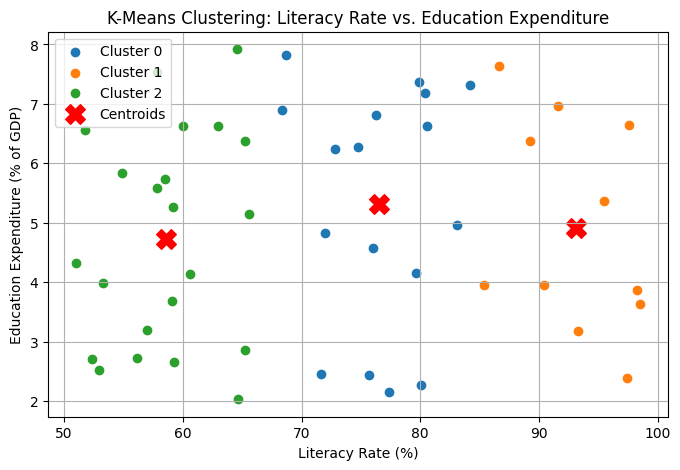

In [ ]:
from sklearn.cluster import KMeans

# Select two columns for clustering
data_for_clustering = education_data[["Literacy_Rate (%)", "Education_Expenditure (% of GDP)"]]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
education_data["Cluster"] = kmeans.fit_predict(data_for_clustering)

# Visualization
plt.figure(figsize=(8, 5))
for cluster in range(3):
    cluster_data = education_data[education_data["Cluster"] == cluster]
    plt.scatter(cluster_data["Literacy_Rate (%)"], cluster_data["Education_Expenditure (% of GDP)"], label=f"Cluster {cluster}")

# Cluster Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering: Literacy Rate vs. Education Expenditure")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Education Expenditure (% of GDP)")
plt.legend()
plt.grid(True)
plt.show()
